Code put together, but not authored, by Ruba Alomari.

This notebook in full is adapted from:

1- Code authored by Serrano available here:
https://github.com/luisguiserrano/manning/tree/master/Chapter_11_Support_Vector_Machines

and

2- Code authored by Geron available here:
https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb



Scikit learn comes with dataset loading utilities, check it out here https://scikit-learn.org/stable/datasets.html


In [224]:
#import libraries

import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [225]:
#functions to plot our points and draw the lines

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.legend(['label 1','label 0'])

#Code block authored by xx available at http
def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()

# Build a linearly separable dataset

In [226]:
#Create an empty list called rows
rows = []

#Importing "random" for random operations
import random

#Adding points and using random() to generate a random number between 0 and 1
#Generate x and y using the random.random() function. 
#These numbers are scaled to be between -3 and 3 by multiplying the random value (which is between 0 and 1) by 6 and then subtracting 3.

for i in range(50):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = int(x+y > 0.5)
    rows.append([x,y,z])
 

#Adding noise
for i in range(10):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = random.randint(0,1)
    rows.append([x,y,z])
   
    
df_linear = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])
df_linear

,x_1,x_2,y
0,1.109988,2.150271,1
1,0.364006,-1.869893,0
2,-0.355134,1.913736,1
3,-1.333095,-1.155974,0
4,-1.011550,1.531293,1
5,2.577329,0.416909,1
6,1.600386,-1.392254,0
7,1.648821,-2.240874,0
8,0.095439,2.815362,1
9,0.606312,2.192718,1


# Linear Dataset SVM Classification 
# 1- Use SVC with a Linear Kernel

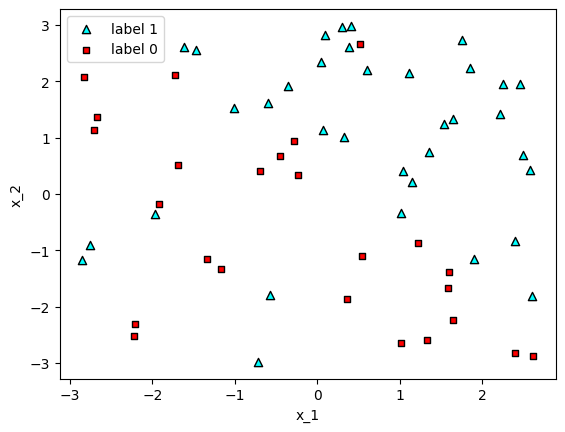

In [227]:
#Loading the linear dataset features and labels

features = df_linear[['x_1', 'x_2']]
labels = df_linear['y']
plot_points(features, labels)

Accuracy: 0.7833333333333333


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


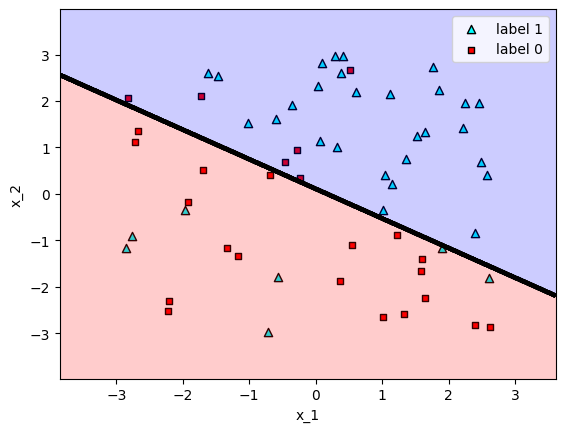

In [228]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print("Accuracy:", svm_linear.score(features, labels))
plot_model(features, labels, svm_linear)

## The effect of C hyperparamater on the SVM classifier

C = 0.01
Accuracy: 0.6666666666666666


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


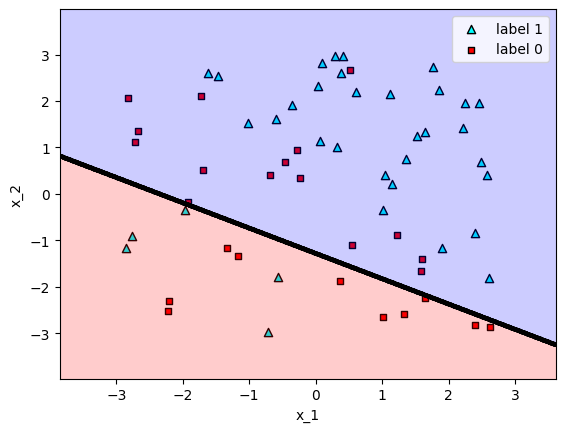

C = 100
Accuracy: 0.7833333333333333


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


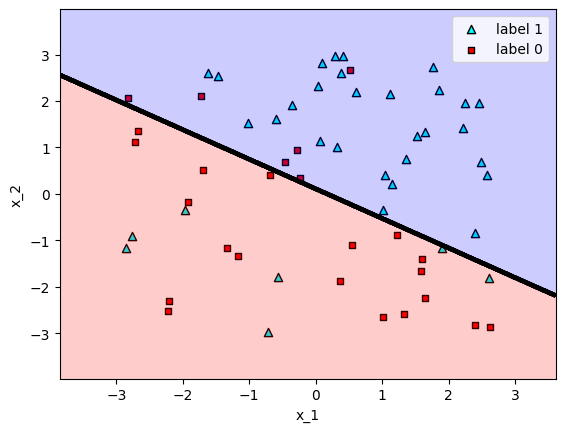

In [229]:
# C = 0.01 ,soft margin, allow for misclassification

svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))
plot_model(features, labels, svm_c_001)

# C = 100, hard margin, focuses more on classifying the points correctly, reduce classification error:

svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))
plot_model(features, labels, svm_c_100)

## Nonlinear SVM Classification

In [230]:
#make moons

from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


X, y = moons = make_moons(n_samples=100, shuffle=True, noise=0.10, random_state=42)
#X, y = moons = make_moons(n_samples=100, shuffle=True, noise=0.40, random_state=42)

In [231]:
#split the dataset into 80% training set and 20% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


In [232]:
#plot the moons dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

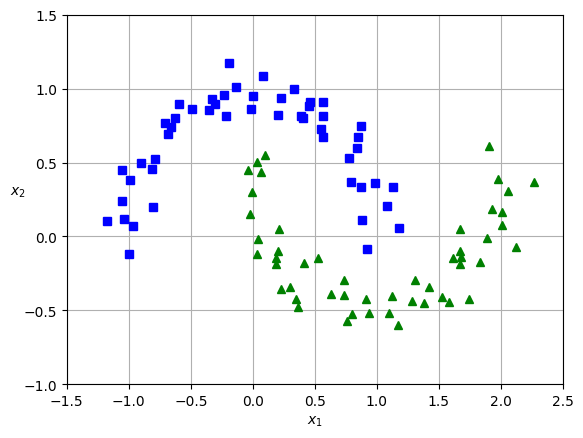

In [233]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Nonlinear SVM Classification 
# 1- Use a LinearSVC and Add Polynomial Features

In [234]:
#Nonlinear SVM Classification

from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42)
)
polynomial_svm_clf.fit(X, y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

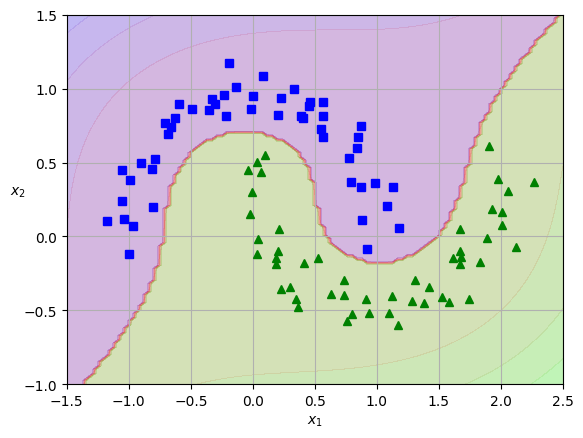

In [235]:
#Plot prediction decision boundary

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# Nonlinear SVM Classification 
# 2- Use a Polynomial Kernel

In [236]:
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, C=5)
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='poly'))])

In [237]:
poly10_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, C=5)
)
poly10_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, degree=10, kernel='poly'))])

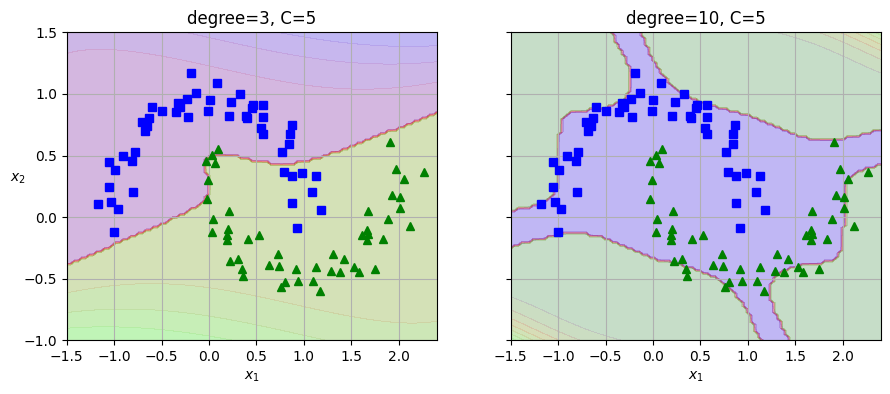

In [238]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, C=5")

plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, C=5")
plt.ylabel("")

plt.show()

# Nonlinear SVM Classification 
# 3- Use a Gaussian RBF Kernel

# Building a two-circular dataset

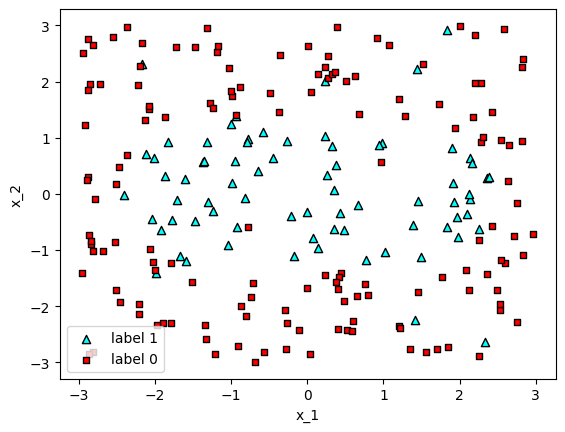

In [239]:
rows = []

import random

#Adding points
for i in range(200):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = int(((x-1)**2+y**2 < 2) or ((x+1)**2+y**2 < 2))
    rows.append([x,y,z])

#Adding noise
for i in range(20):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = random.randint(0,1)
    rows.append([x,y,z])

    
df_two_circles = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])

plot_points(df_two_circles[['x_1', 'x_2']], df_two_circles['y'])


In [240]:
features = df_two_circles[['x_1', 'x_2']]
labels = df_two_circles['y']

Gamma = 0.1
Accuracy: 0.8863636363636364


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


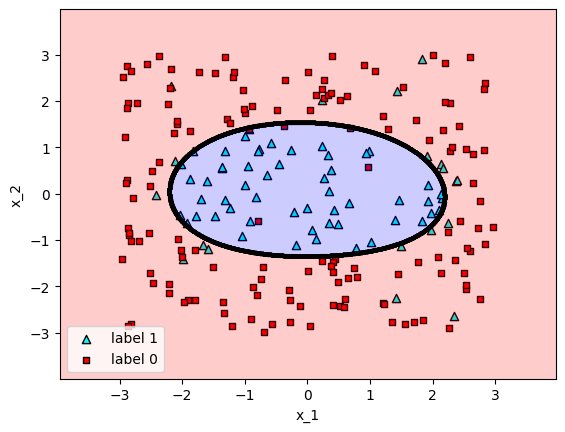

In [241]:
# gamma = 0.1
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(features, labels)
print("Gamma = 0.1")
print("Accuracy:", svm_gamma_01.score(features, labels))
plot_model(features, labels, svm_gamma_01)

# Experimenting with gammas in the rbf kernel

Gamma = 1
Accuracy: 0.9363636363636364


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


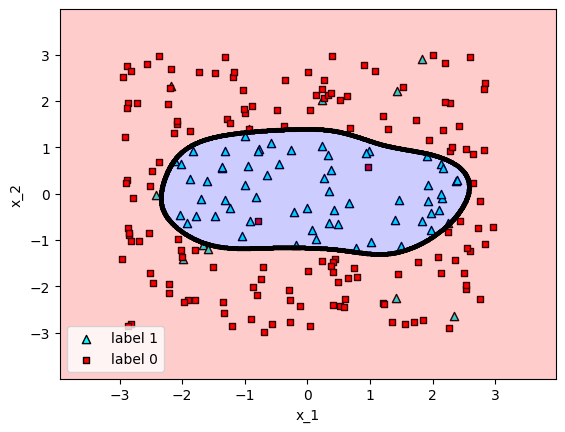

Gamma = 10
Accuracy: 0.9590909090909091


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


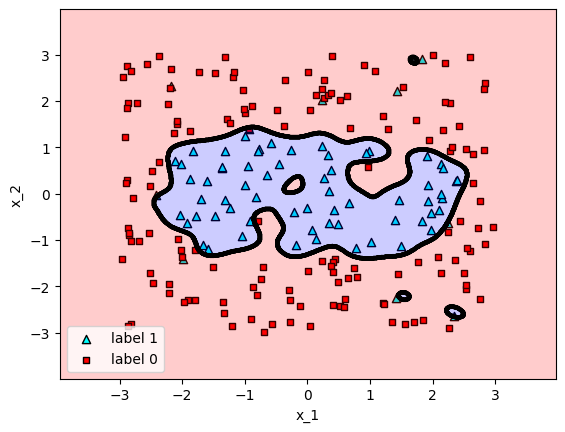

Gamma = 100
Accuracy: 0.9818181818181818


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


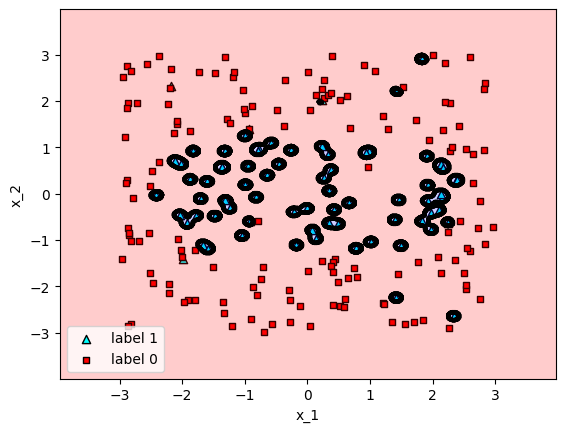

In [242]:
# gamma = 1
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(features, labels)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))
plot_model(features, labels, svm_gamma_1)

# gamma = 10
svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(features, labels)
print("Gamma = 10")
print("Accuracy:", svm_gamma_10.score(features, labels))
plot_model(features, labels, svm_gamma_10)

# gamma = 100
svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(features, labels)
print("Gamma = 100")
print("Accuracy:", svm_gamma_100.score(features, labels))
plot_model(features, labels, svm_gamma_100)